# 看图选方法

Sklearn 官网提供了一个流程图， 蓝色圆圈内是判断条件，绿色方框内是可以选择的算法
![pic](./pictures/2_1_1.png)

从 START 开始，首先看数据的样本是否 `>50`，小于则需要收集更多的数据。

由图中，可以看到算法有四类，`分类，回归，聚类，降维`。

其中 `分类和回归`是监督式学习，即每个数据对应一个 label。 `聚类` 是非监督式学习，即没有 label。 另外一类是 `降维`，当数据集有很多很多属性的时候，可以通过 降维 算法把属性归纳起来。例如 20 个属性只变成 2 个，注意，这不是挑出 2 个，而是压缩成为 2 个，它们集合了 20 个属性的所有特征，相当于把重要的信息提取的更好，不重要的信息就不要了。

然后看问题属于哪一类问题，是分类还是回归，还是聚类，就选择相应的算法。 当然还要考虑数据的大小，例如 `100K` 是一个阈值。

可以发现有些方法是既可以作为分类，也可以作为回归，例如 `SGD`。

# 通用学习模式

Sklearn 把所有机器学习的模式整合统一起来了，学会了一个模式就可以通吃其他不同类型的学习模式

例如，分类器，

Sklearn 本身就有很多数据库，可以用来练习。 以 Iris 的数据为例，这种花有四个属性，花瓣的长宽，茎的长宽，根据这些属性把花分为三类。

我们要用 分类器 去把四种类型的花分开。

今天用 KNN classifier，就是选择几个临近点，综合它们做个平均来作为预测值

In [9]:
# 导入模块
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 创建数据
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

# 打印导入的数据
print(iris_X)  
print(iris_X[0][0])  # 输出 5.1
print(iris_X[:2, :])  # 输出前两行的所有列
print(iris_y)
# 结论：可以看到X有4个属性，y有0、1、2三类

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [18]:
# 将数据集分为训练集和测试集，设定测试集占总数据的0.3
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size = 0.3)
print(y_train)

[2 2 0 1 1 1 2 0 2 1 0 1 2 2 1 1 0 0 0 2 1 1 2 2 1 0 1 2 2 1 2 1 0 0 2 1 2
 1 0 2 0 0 0 2 1 2 2 1 2 1 0 0 1 1 1 2 1 1 0 0 1 0 2 1 1 2 0 0 1 1 2 2 0 1
 2 0 2 0 2 0 1 1 2 0 2 0 2 0 0 1 2 0 2 2 0 0 1 1 0 0 2 2 2 2 1]


In [20]:
# 建立模型-训练-预测

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)  # 用fit训练training data
print(knn.predict(X_test))
print(y_test)

[2 0 1 0 2 0 2 2 0 0 2 0 2 0 2 1 0 0 0 1 0 2 1 0 2 2 1 1 1 0 1 2 1 1 2 2 1
 0 1 0 1 0 0 1 1]
[2 0 1 0 2 0 2 2 0 0 2 0 2 0 2 1 0 0 0 1 0 2 1 0 2 2 1 1 1 0 1 2 1 1 2 2 1
 0 1 0 1 0 0 1 1]


# sklearn 强大数据库

In [23]:
# 导入模块

from sklearn import datasets
from sklearn.linear_model import LinearRegression

# 导入数据-训练模型
loaded_data = datasets.load_boston()  # sklearn中有着高度统一的形式,load_XXX()
data_X = loaded_data.data  # data代表输入
data_y = loaded_data.target  # target代表输出

print(data_X)
print(data_y)

# 定义模型
model = LinearRegression()
model.fit(data_X, data_y)  # sklearn使用fit进行训练

# 打印出预测值
print(model.predict(data_X[:4, :]))  # 模型训练完之后，sklearn使用predict进行预测
print(data_y[:4])
# 为了提高准确度可以使用不同的model进行训练

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

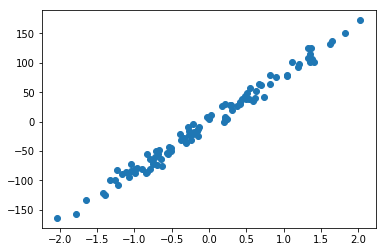

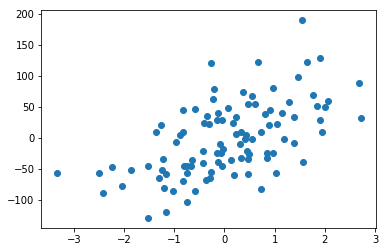

In [29]:
# 创建虚拟数据-可视化

# n_sample代表建立多少个测试样本； n_features代表有几个输入；n_targets代表有几个输出
X, y = datasets.make_regression(n_samples=100, n_features=1, n_targets=1, noise=10) 
# sklearn中固定的创建数据的形式：make_XXX
# print(X)
# print(y)

# 用scatter形式输出结果
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()
# 可以看到用函数生成的Linear Regression用的数据

# nosie越大，点越离散
X, y = datasets.make_regression(n_samples=100, n_features=1, n_targets=1, noise=50)
plt.scatter(X, y)
plt.show()

# sklearn 常用属性与功能

In [46]:
# 学习model的属性和功能

# 以LinearRegression为例
from sklearn import datasets
from sklearn.linear_model import LinearRegression

loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target

model = LinearRegression()

# 使用model,fit训练
# 使用model.predict预测
model.fit(data_X, data_y)
print(model.predict(data_X[:4, :]))


# model.coef_和model.intercept_属于model的属性
print(model.coef_)  # model的斜率
print(model.intercept_)  # model的截距


# model.get_params()取出之前定义的参数
print(model.get_params())

# model.score(data_X, data_y)可以对model用R^2的方式打分，输出精确度
# R^2 coefficient of determination:R^2确定系数
print(model.score(data_X, data_y))

[30.00384338 25.02556238 30.56759672 28.60703649]
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.459488385089855
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
0.7406426641094095


# 正则化 Normalization

In [48]:
# 数据标准化
from sklearn import preprocessing  # 标准化数据模块
import numpy as np

# 建立array
a = np.array([
    [10, 2.7, 3.6],
    [-100, 5, -2],
    [120, 20, 40]
], dtype=np.float64)

# 将normalized后的a打印出
print(preprocessing.scale(a))

[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]


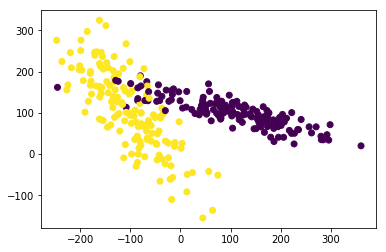

0.5333333333333333
0.9666666666666667


D:\1-Anaconda\AnacondaInstall\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\1-Anaconda\AnacondaInstall\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [55]:
# 数据标准化对ML成效的影响

# 加载模块

# 标准化数据模块
from sklearn import preprocessing
import numpy as np

# 将资料分割成train和test的模块
from sklearn.model_selection import train_test_split

# 生成适合做classification资料的模块
from sklearn.datasets.samples_generator import make_classification

# SVM中的SVC
from sklearn.svm import SVC

# 可视化数据的模块
import matplotlib.pyplot as plt


# 生成适合做Classification的数据
# 生成具有2种属性的300笔数据
X, y = make_classification(
    n_samples=300, n_features=2,
    n_redundant=0, n_informative=2,
    random_state=22, n_clusters_per_class=1,
    scale=100
)

# 可视化数据
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


# 数据标准化前
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
# 0.477777777778



# 数据标准化后
X = preprocessing.scale(X)  # 做了个标准化
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
# 0.94444444444

# 检验神经网络

+ Traing and Test data
+ 误差曲线
+ 准确度曲线
+ 正规化
+ 交叉验证

# 交叉验证-1-Cross validation

In [57]:
# 交叉验证可以帮助我们正确的选择model和model的参数

#  model 基础验证法
from sklearn.datasets import load_iris  # iris数据集
from sklearn.model_selection import train_test_split  # 分割数据模块
from sklearn.neighbors import KNeighborsClassifier  # KNN

# 加载iris数据集
iris = load_iris()
X = iris.data
y = iris.target

# 分割数据
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# 建立模型
knn = KNeighborsClassifier()

# 训练模型
knn.fit(X_train, y_train)

# 准确率
print(knn.score(X_test, y_test))

0.9736842105263158


In [62]:
# model 交叉验证法（Cross validation）

# 注：这里本来的代码导入不进去cross_val_score,用下面的
# from sklearn.cross_validation import cross_val_score  # K折交叉验证模块
from sklearn.model_selection import cross_val_score

# 使用K折交叉验证模块
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

# 将5次的预测准确率打印出
print(scores)

# 打印5次预测的平均值
print(scores.mean())

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


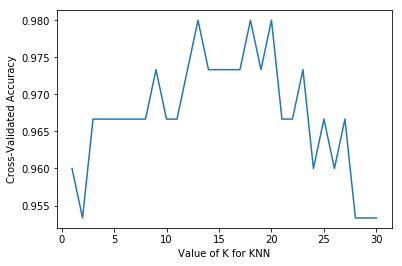

In [64]:
# 以准确率（accuracy）判断
# 一般准确率用来判断分类（Classification）模型的好坏

import matplotlib.pyplot as plt

# 建立测试参数集
k_range = range(1, 31)

k_scores = []

# 由迭代的方式来计算不同参数对模型的影响，并返回交叉验证后的平均准确率
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    k_scores.append(scores.mean())
    
# 可视化
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# 从图中可以得知，选择12~18的k值最好。高过18之后，准确率开始下降则是因为过拟合(Over fitting)的问题。

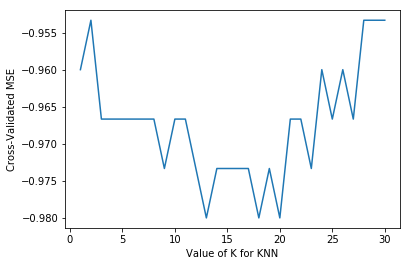

In [67]:
# 以平均方差（Mean squared error）

# 一般来说平均方差(Mean squared error)会用于判断回归(Regression)模型的好坏

import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = -cross_val_score(knn, X, y, cv=10)
    k_scores.append(loss.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

# 由图可以得知，平均方差越低越好，因此选择13~18左右的K值会最好。

# 交叉验证-2-Cross validation

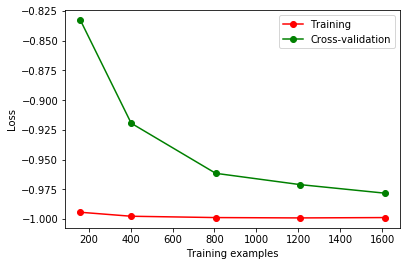

In [77]:
# learining curve 验视过拟合

# 加载对应模块
# 主要意思 :  主要意思是说在0.18版本中，cross_validation被废弃了,在 0.20版本中，将被删除
# 解决办法：
# 将 from sklearn.learning_curve import learning_curve 修改为: from sklearn.model_selection import learning_curve
# 即 从  model_selection 中导入  learning_curve 模块
from sklearn.model_selection import learning_curve  # 学习曲线模块
from sklearn.datasets import load_digits  # digits数据集
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np


digits = load_digits()
X = digits.data
y = digits.target

train_sizes, train_loss, test_loss = learning_curve(SVC(gamma=0.001), X, y, cv=10, train_sizes=[0.1, 0.25, 0.5, 0.75, 1])

#平均每一轮所得到的平均方差(共5轮，分别为样本10%、25%、50%、75%、100%)
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

# 可视化
plt.plot(train_sizes, train_loss_mean, 'o-', color="r",
         label="Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g",
        label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

# 交叉验证-3-Cross validation

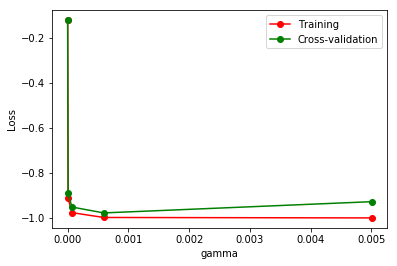

In [80]:
# validation_curve,用这一种曲线我们就能更加直观看出改变模型中的参数的时候有没有过拟合(overfitting)的问题

from sklearn.model_selection import validation_curve #validation_curve模块
from sklearn.datasets import load_digits 
from sklearn.svm import SVC 
import matplotlib.pyplot as plt 
import numpy as np

#digits数据集
digits = load_digits()
X = digits.data
y = digits.target

#建立参数测试集
param_range = np.logspace(-6, -2.3, 5)

#使用validation_curve快速找出参数对模型的影响
train_loss, test_loss = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range, cv=10)

#平均每一轮的平均方差
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

#可视化图形
plt.plot(param_range, train_loss_mean, 'o-', color="r",
         label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g",
        label="Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()
# 由图中可以明显看到gamma值大于0.001，模型就会有过拟合(Overfitting)的问题

# 保存模型

In [82]:
# 使用pickle保存

from sklearn import svm
from sklearn import datasets

clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X,y)

# 使用pickle来保存与读取训练好的Model
import pickle #pickle模块

#保存Model(注:save文件夹要预先建立，否则会报错)
with open('save/clf.pickle', 'wb') as f:
    pickle.dump(clf, f)

#读取Model
with open('save/clf.pickle', 'rb') as f:
    clf2 = pickle.load(f)
    #测试读取后的Model
    print(clf2.predict(X[0:1]))

# [0]

[0]


D:\1-Anaconda\AnacondaInstall\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [83]:
# 使用joblib保存

from sklearn.externals import joblib #jbolib模块

#保存Model(注:save文件夹要预先建立，否则会报错)
joblib.dump(clf, 'save/clf.pkl')

#读取Model
clf3 = joblib.load('save/clf.pkl')

#测试读取后的Model
print(clf3.predict(X[0:1]))

# [0]

# 最后可以知道joblib在使用上比较容易，读取速度也相对pickle快

[0]
